In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [2]:
data = pd.read_csv('../data_files/book_reviews_sample.csv')
data.head(5)

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [4]:
data['review_text_clean'] = data['reviewText'].str.lower()

In [7]:
data['review_text_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])", "", x['review_text_clean']), axis=1)
data.head(5)

,index,reviewText,rating,review_text_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [14]:
vader_sentiment = SentimentIntensityAnalyzer()

In [15]:
data['sentiment_score'] = data['review_text_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])
data.head(5)


,index,reviewText,rating,review_text_clean,sentiment,sentiment_score,sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,NaN,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,NaN,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,NaN,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,NaN,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,NaN,-0.4767,negative


In [16]:
bins = [-1,-0.1,0.1,1]
names = ['negative', 'neutral', 'positive']
data['sentiment_label'] = pd.cut(data['sentiment_score'], bins, labels=names)
data.head(5)

,index,reviewText,rating,review_text_clean,sentiment,sentiment_score,sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,NaN,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,NaN,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,NaN,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,NaN,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,NaN,-0.4767,negative


<Axes: xlabel='sentiment_label'>

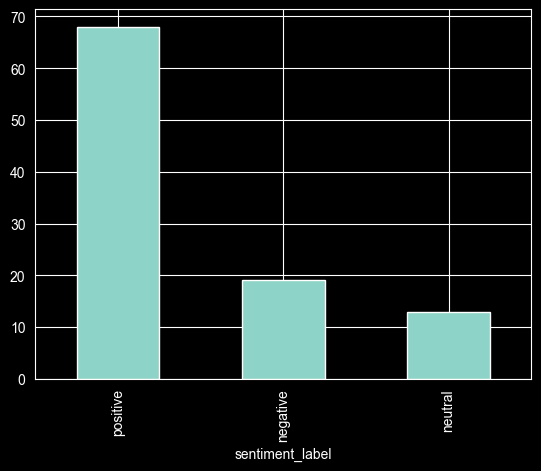

In [17]:
data['sentiment_label'].value_counts().plot.bar()

In [18]:
transformers_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [20]:
transformer_labels = []
for review in data['review_text_clean']:
    sentiment_list = transformers_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)
data['transformer_label'] = transformer_labels

In [21]:
data.head(5)

,index,reviewText,rating,review_text_clean,sentiment,sentiment_score,sentiment_label,transformer_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,NaN,0.7684,positive,[POSITIVE]
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,NaN,0.9325,positive,[POSITIVE]
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,NaN,0.6740,positive,[NEGATIVE]
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,NaN,0.6652,positive,[NEGATIVE]
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,NaN,-0.4767,negative,[NEGATIVE]


<Axes: xlabel='transformer_label'>

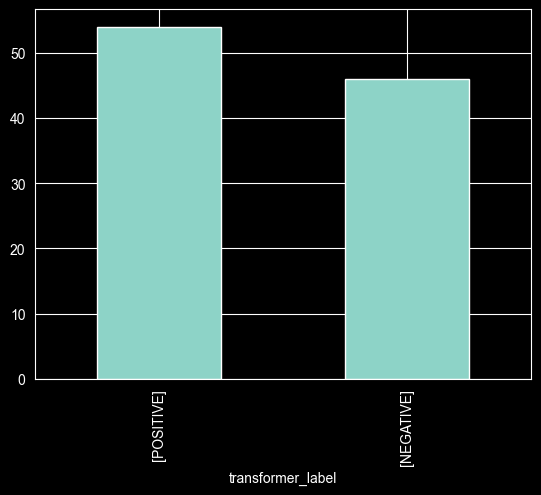

In [22]:
data['transformer_label'].value_counts().plot.bar()